Task (a) : 
Reading the dataset and creating a dataframe using the read function

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading data into dataframe
signal_training = pd.read_csv('signal_training.txt', sep='        ', engine='python')
background_training = pd.read_csv('background_training.txt', sep='        ' , engine='python')

Creating probability distribution functions using the seaborn library. Somehow I'm unable to obtain proper PDS for the second and third variable. With less data I was able to compute the PDF's but they did not make much sense. When using the entire dataset my code executed very slowly and the graphs did not provide any usefull information. Adjusting the x-lim of said plots also didn't help.

<AxesSubplot:xlabel='N_iso_trk', ylabel='Density'>

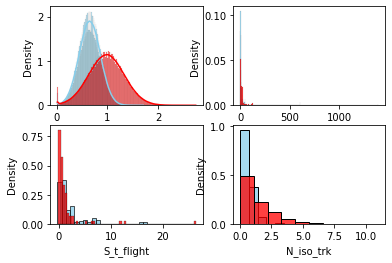

In [15]:
fig, axs = plt.subplots(ncols=2, nrows=2)

x = signal_training['E_T_iso'][:100]

sns.histplot(signal_training['r_cal'], kde=True, stat="density", color="skyblue", label="Signal", ax=axs[0, 0])
sns.histplot(background_training['r_cal'], kde=True, stat="density", color="red", label="Background", ax=axs[0, 0])

sns.histplot(signal_training['E_T_iso'][:100], stat="density", color="skyblue", label="Signal", ax=axs[0, 1])
sns.histplot(background_training['E_T_iso'][:100], stat="density", color="red", label="Background", ax=axs[0, 1])

sns.histplot(signal_training['S_t_flight'][:100], stat="density", color="skyblue", label="Signal", ax=axs[1, 0])
sns.histplot(background_training['S_t_flight'][:100], stat="density", color="red", label="Background", ax=axs[1, 0])

sns.histplot(signal_training['N_iso_trk'], stat="density", color="skyblue", label="Signal", ax=axs[1, 1], bins=10)
sns.histplot(background_training['N_iso_trk'], stat="density", color="red", label="Background", ax=axs[1, 1], bins=10)

Task (b) :
Calculating the Coefficient matrix using pandas

In [21]:
print("Signal Coefficient Matrix : \n", signal_training.corr(), "\n")
print("Background Coefficient Matrix : \n", background_training.corr())

Signal Coefficient Matrix : 
                r_cal   E_T_iso  S_t_flight  N_iso_trk
r_cal       1.000000  0.003716   -0.000360   0.108488
E_T_iso     0.003716  1.000000   -0.000026   0.001180
S_t_flight -0.000360 -0.000026    1.000000   0.000028
N_iso_trk   0.108488  0.001180    0.000028   1.000000 

Background Coefficient Matrix : 
                r_cal   E_T_iso  S_t_flight  N_iso_trk
r_cal       1.000000  0.001103    0.001260   0.238801
E_T_iso     0.001103  1.000000   -0.000008   0.000554
S_t_flight  0.001260 -0.000008    1.000000   0.001069
N_iso_trk   0.238801  0.000554    0.001069   1.000000


The results show us, that there aren't any significant correlations between the individual variables. However both matrices show a correlation between r_cal and N_iso_trk with a value of .1 in the case f the signal and .23 in the case of the background data. Hence I will only plot this correlation as I assume all others should approach 0 with more and better observations.

Threshold for 0 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 1 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 2 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.079
Threshold for 3 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.113
Threshold for 4 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.156
Threshold for 5 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.254
Threshold for 6 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.822
Threshold for 7 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.7


Threshold for 0 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 1 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 2 numbers of tracks in isolation region in Singaldata : r_cal_min = 0.01
Threshold for 3 numbers of tracks in 

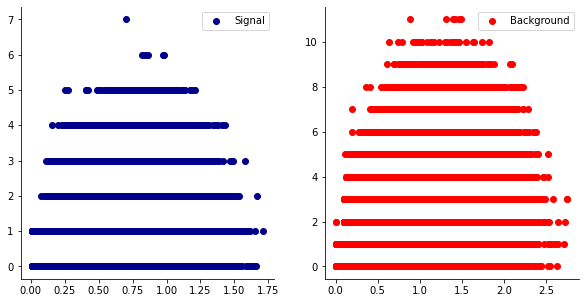

In [67]:
plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1).spines[['right', 'top']].set_visible(False)
plt.scatter(signal_training['r_cal'], signal_training['N_iso_trk'], color='darkblue', label='Signal')
plt.legend()

plt.subplot(1, 2, 2).spines[['right', 'top']].set_visible(False)
plt.scatter(background_training['r_cal'], background_training['N_iso_trk'], color='red', label='Background')
plt.legend()

for i in range(8):
    x = signal_training.query("N_iso_trk == @i")
    print(f"Threshold for {i} numbers of tracks in isolation region in Singaldata : r_cal_min = {x['r_cal'].min()}")

print("\n")

for i in range(8):
    x = background_training.query("N_iso_trk == @i")
    print(f"Threshold for {i} numbers of tracks in isolation region in Singaldata : r_cal_min = {x['r_cal'].min()}")

From this we can see, that with a rising value of tracks in isolation regions certains thresholds for r_cal exists. The threshold is in most cases proportional to the number of tracks. With a few small exceptions for very high balues of N_iso_trk.